In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 3].values

print(X)
print(y)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [25]:
?y_pred = classifier.predict(X_test)


Object `y_pred = classifier.predict(X_test)` not found.


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix


In [27]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 90.00%


/tmp/ipython-input-1000520259.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


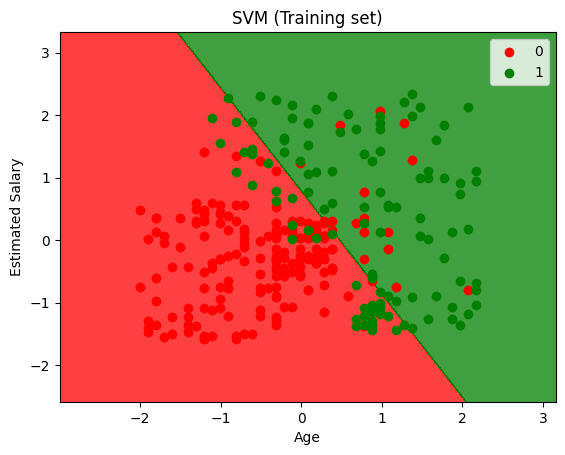

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [29]:
print(classifier.dual_coef_)
print(classifier.intercept_)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.70942619 -1.         -1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.     

In [30]:
weights = classifier.coef_  # shape: (10, 784)
bias = classifier.intercept_


In [32]:
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n\n")

    f.write("double weights[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights:
        f.write("    {" + ", ".join(f"{v:.10f}" for v in row) + "},\n")
    f.write("};\n\n")

    f.write("double bias[NUM_CLASSES] = {" + ", ".join(f"{b:.10f}" for b in bias) + "};\n")

print("Exported SVM model to svm_model.h")


Exported SVM model to svm_model.h


In [33]:
mean = sc.mean_
scale = sc.scale_

with open("scaler.h", "w") as f:
    f.write(f"#define NUM_FEATURES {len(mean)}\n\n")

    f.write("double mean[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(f"{m:.10f}" for m in mean) + "};\n\n")

    f.write("double scale[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(f"{s:.10f}" for s in scale) + "};\n")

print("Exported scaler parameters to scaler.h")


Exported scaler parameters to scaler.h
